Sprocket Central Pty Ltd is a long-standing KPMG client whom specialises in high-quality bikes and accessible cycling accessories to riders. Their marketing team is looking to boost business by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For Customer Demographic Dataset

In [2]:
custDemo = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name="CustomerDemographic", skiprows=1)
custDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
custDemo.shape

(4000, 13)

# For Customer Addressess Dataset

In [4]:
custAd = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name="CustomerAddress", skiprows=1)
custAd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [5]:
custAd.shape

(3999, 6)

# For Transactions Dataset

In [6]:
tran = pd.read_excel("KPMG_VI_New_raw_data_update_final (1).xlsx", sheet_name="Transactions", skiprows=1)
tran.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [7]:
tran.shape

(20000, 13)

# Combining All Dataset

In [8]:
merged_df = pd.merge(custDemo,custAd,how='inner',on="customer_id")
df = pd.merge(merged_df,tran,how='inner',on='customer_id')

In [9]:
df.shape

(19968, 30)

In [10]:
#df = df.head(1000)

In [11]:
df.shape

(19968, 30)

In [12]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


##  Data Wrangling

In [13]:
missing_val = df.isnull().sum()
missing_val[missing_val>0]

last_name                   642
DOB                         446
job_title                  2379
job_industry_category      3222
default                    1451
tenure                      446
online_order                359
brand                       195
product_line                195
product_class               195
product_size                195
standard_cost               195
product_first_sold_date     195
dtype: int64

In [14]:
(missing_val[missing_val>0] / df.shape[0]) *100

last_name                   3.215144
DOB                         2.233574
job_title                  11.914062
job_industry_category      16.135817
default                     7.266627
tenure                      2.233574
online_order                1.797877
brand                       0.976562
product_line                0.976562
product_class               0.976562
product_size                0.976562
standard_cost               0.976562
product_first_sold_date     0.976562
dtype: float64

In [15]:
df['job_industry_category'].unique()

array(['Health', 'Financial Services', 'IT', nan, 'Retail', 'Argiculture',
       'Property', 'Manufacturing', 'Telecommunications', 'Entertainment'],
      dtype=object)

In [16]:
df['DOB'].sort_values()

171     1843-12-21
172     1843-12-21
173     1843-12-21
179     1843-12-21
178     1843-12-21
           ...    
19227          NaT
19825          NaT
19826          NaT
19827          NaT
19828          NaT
Name: DOB, Length: 19968, dtype: datetime64[ns]

In [17]:
import datetime
df['age'] = (datetime.datetime.now().year) - (pd.DatetimeIndex(df['DOB']).year)
df['age'].head()

0    67.0
1    67.0
2    67.0
3    67.0
4    67.0
Name: age, dtype: float64

In [18]:
#replace NaN with its mean
df['tenure'] = df['tenure'].replace(np.nan,df['tenure'].mean())
df['tenure'].head()

0    11.0
1    11.0
2    11.0
3    11.0
4    11.0
Name: tenure, dtype: float64

In [19]:
df = df.dropna(subset=['brand'])

In [20]:
df['age'].mean()
df['age'] = df['age'].replace(np.nan,df['age'].mean())

In [21]:
df.shape

(19773, 31)

In [22]:
missing_val = df.isnull().sum()
missing_val[missing_val>0]

last_name                 638
DOB                       438
job_title                2350
job_industry_category    3192
default                  1433
online_order              357
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.shape

(12970, 31)

In [25]:
new_cus = df.head(1000)

In [26]:
new_cus.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,67.0
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,67.0
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,67.0
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,67.0
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,67.0


In [27]:
new_cus.shape

(1000, 31)

In [28]:
new_cus['gender'] = new_cus['gender'].replace(['F','Femal'],['Female','Female']) 

c:\users\aitezaz akhtar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
new_cus['gender'].value_counts()

Male      553
Female    447
Name: gender, dtype: int64

In [30]:
new_cus.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,67.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,67.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,67.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,67.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,67.0


In [31]:
age_bins = np.linspace(new_cus['age'].min(),new_cus['age'].max(),4)
age_bins

array([18.        , 34.33333333, 50.66666667, 67.        ])

In [32]:
gp_name = ['18-34','35-50','51-67']
gp_name

['18-34', '35-50', '51-67']

In [33]:
new_cus['age-binned']=pd.cut(new_cus['age'],age_bins,labels=gp_name,include_lowest=True) 

c:\users\aitezaz akhtar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
new_cus.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age,age-binned
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,67.0,51-67
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,67.0,51-67
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,67.0,51-67
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,67.0,51-67
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,67.0,51-67


In [35]:
#new_cus.to_excel('abc.xlsx')

## Data Exploration

In [36]:
gen_dis = new_cus['gender'].value_counts()
gen_dis

Male      553
Female    447
Name: gender, dtype: int64

<BarContainer object of 2 artists>

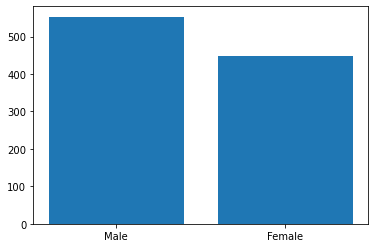

In [37]:
plt.bar(gen_dis.index,gen_dis.values)

We see that most of the buyers are Male

In [38]:
age_dis = new_cus.groupby('age-binned')['gender'].count()
age_dis

age-binned
18-34    244
35-50    444
51-67    312
Name: gender, dtype: int64

<BarContainer object of 3 artists>

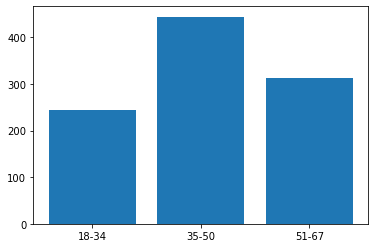

In [39]:
plt.bar(age_dis.index,age_dis.values)

We see that most of the buyers have age between 35-40

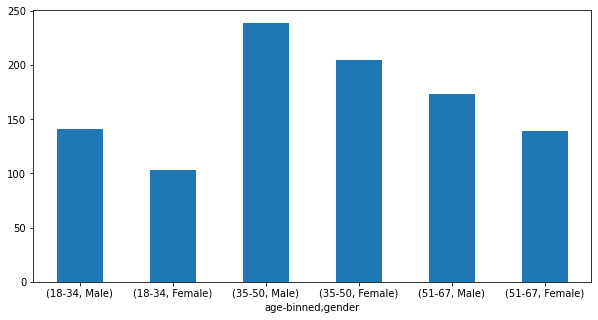

In [40]:
new_cus.groupby('age-binned')['gender'].value_counts().plot(kind='bar', rot=0, figsize=(10,5))

We can also see that most of the customers which are from age 35-50 are Male

#### Past 3yrs purchase

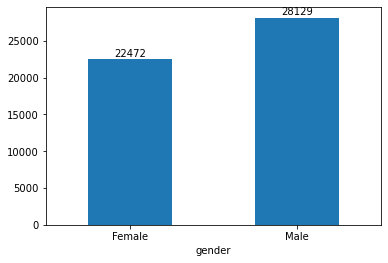

In [41]:
#Analyze 3yrs purchase w.r.t gender

ax = new_cus.groupby('gender')['past_3_years_bike_related_purchases'].sum().plot(kind='bar',rot=0)
plt.xticks(rotation = 0)

for p in ax.patches:
    height=p.get_height()
    ax.annotate(height,
                xy=(p.get_x()+p.get_width() / 2,height),
                ha = 'center',
                va='bottom',
                xytext=(0, 1),
                textcoords="offset points",
    )

Most Purchases in the last year are done by Male

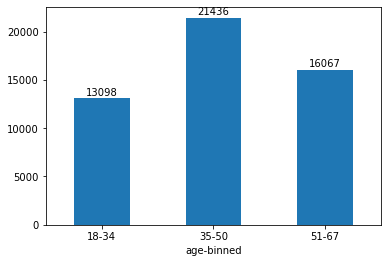

In [42]:
#Analyze 3yrs purchase w.r.t age-distribution

ax = new_cus.groupby('age-binned')['past_3_years_bike_related_purchases'].sum().plot(kind='bar',rot=0)
plt.xticks(rotation = 0)

for p in ax.patches:
    height=p.get_height()
    ax.annotate(height,
                xy=(p.get_x()+p.get_width() / 2,height),
                ha = 'center',
                va='bottom',
                xytext=(0, 1),
                textcoords="offset points",
    )

We can see that in the past 3 years most of the bikes purchases are from the age 35-50

#### Wealth Segment

In [44]:
df['wealth_segment'].unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [45]:
w = df['wealth_segment'].value_counts()
w

Mass Customer        6382
High Net Worth       3317
Affluent Customer    3271
Name: wealth_segment, dtype: int64

<BarContainer object of 3 artists>

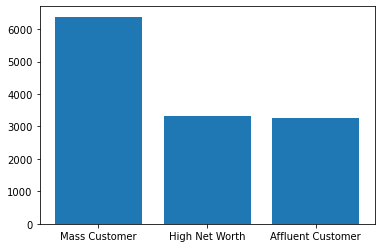

In [46]:
# wealth segment
plt.bar(w.index,w.values)

#### State 

In [50]:
df['state'].value_counts()

NSW                6587
VIC                2932
QLD                2817
New South Wales     352
Victoria            282
Name: state, dtype: int64

In [51]:
df['state'].replace(['New South Wales','Victoria'],['NSW','VIC'],inplace=True)

In [52]:
df.groupby('state')['owns_car'].count()

state
NSW    6939
QLD    2817
VIC    3214
Name: owns_car, dtype: int64

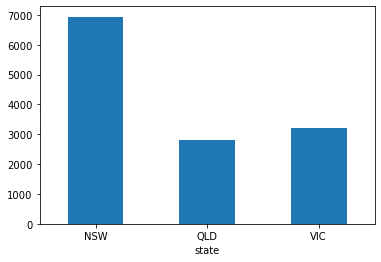

In [53]:
df.groupby('state')['owns_car'].count().plot(kind='bar',rot=0)

We see that QLD state has lower no of people which can own car so we can target this state 

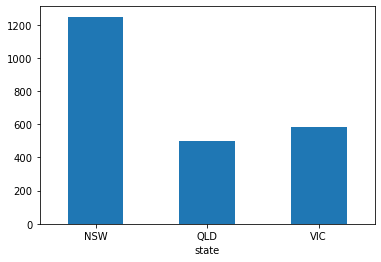

In [54]:
df.groupby('state')['customer_id'].nunique().plot(kind='bar',rot=0)

Most of our customers are from NSW

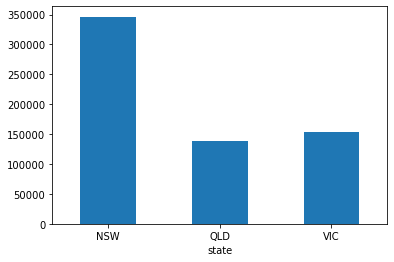

In [55]:
df.groupby('state')['past_3_years_bike_related_purchases'].sum().plot(kind='bar',rot=0)

Also most bikes were sold to people from NSW in past 3 years.

## Feature Selection

In [56]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,67.0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,67.0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,67.0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,67.0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,67.0


In [85]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'past_3yrs_pur',
       'DOB', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'default', 'owns_car', 'tenure', 'address',
       'postcode', 'state', 'country', 'property_valuation', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'age'],
      dtype='object')

In [86]:
df.rename(columns={'past_3_years_bike_related_purchases':'past_3yrs_pur'},inplace=True)

In [87]:
final_df = df[['gender','past_3yrs_pur','wealth_segment','deceased_indicator','owns_car','tenure','state','property_valuation',\
              'product_class','list_price','age']]
final_df.head()

,gender,past_3yrs_pur,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_class,list_price,age
0,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,235.63,67.0
1,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,1577.53,67.0
2,Female,93,Mass Customer,N,Yes,11.0,NSW,10,low,1720.70,67.0
3,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,360.40,67.0
4,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,71.49,67.0


In [90]:
df = final_df
df.head()

,gender,past_3yrs_pur,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_class,list_price,age
0,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,235.63,67.0
1,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,1577.53,67.0
2,Female,93,Mass Customer,N,Yes,11.0,NSW,10,low,1720.70,67.0
3,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,360.40,67.0
4,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,71.49,67.0


In [91]:
final_df = pd.get_dummies(data=final_df,columns=['gender','wealth_segment','owns_car','deceased_indicator',\
                                                 'state','product_class'])
final_df.head()

,past_3yrs_pur,tenure,property_valuation,list_price,age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,deceased_indicator_N,deceased_indicator_Y,state_NSW,state_QLD,state_VIC,product_class_high,product_class_low,product_class_medium
0,93,11.0,10,235.63,67.0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1
1,93,11.0,10,1577.53,67.0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1
2,93,11.0,10,1720.70,67.0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0
3,93,11.0,10,360.40,67.0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1
4,93,11.0,10,71.49,67.0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1


## Data Transformation

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
X = final_df.values
X

array([[93., 11., 10., ...,  0.,  0.,  1.],
       [93., 11., 10., ...,  0.,  0.,  1.],
       [93., 11., 10., ...,  0.,  1.,  0.],
       ...,
       [73., 18.,  5., ...,  0.,  0.,  1.],
       [73., 18.,  5., ...,  0.,  0.,  1.],
       [73., 18.,  5., ...,  0.,  0.,  1.]])

In [94]:
X = StandardScaler().fit_transform(X)
X

array([[ 1.5249657 ,  0.04579451,  0.87885264, ..., -0.42925352,
        -0.41824068,  0.66163158],
       [ 1.5249657 ,  0.04579451,  0.87885264, ..., -0.42925352,
        -0.41824068,  0.66163158],
       [ 1.5249657 ,  0.04579451,  0.87885264, ..., -0.42925352,
         2.39096781, -1.51141516],
       ...,
       [ 0.82702735,  1.28099471, -0.88751424, ..., -0.42925352,
        -0.41824068,  0.66163158],
       [ 0.82702735,  1.28099471, -0.88751424, ..., -0.42925352,
        -0.41824068,  0.66163158],
       [ 0.82702735,  1.28099471, -0.88751424, ..., -0.42925352,
        -0.41824068,  0.66163158]])

## Model Development

We will be applying customer segmentation to cluster them using K-means algorithm. As we want to target customer based on their trends and behavoiur K-means algorithm is best suitable as it can group customer base into groups of individual which has similar characteristics so we easily determine their behaviour and easily target them and boost our business.

In [95]:
from sklearn.cluster import KMeans

In [165]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [166]:
cluster_lbl = k_means.labels_
cluster_lbl

array([1, 1, 1, ..., 1, 1, 1])

In [167]:
final_df['Cluster_lbl'] = cluster_lbl
final_df.head()

,past_3yrs_pur,tenure,property_valuation,list_price,age,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,...,owns_car_Yes,deceased_indicator_N,deceased_indicator_Y,state_NSW,state_QLD,state_VIC,product_class_high,product_class_low,product_class_medium,Cluster_lbl
0,93,11.0,10,235.63,67.0,1,0,0,0,1,...,1,1,0,1,0,0,0,0,1,1
1,93,11.0,10,1577.53,67.0,1,0,0,0,1,...,1,1,0,1,0,0,0,0,1,1
2,93,11.0,10,1720.70,67.0,1,0,0,0,1,...,1,1,0,1,0,0,0,1,0,1
3,93,11.0,10,360.40,67.0,1,0,0,0,1,...,1,1,0,1,0,0,0,0,1,1
4,93,11.0,10,71.49,67.0,1,0,0,0,1,...,1,1,0,1,0,0,0,0,1,1


In [168]:
df['Cluster_lbl'] = cluster_lbl
df.head()

,gender,past_3yrs_pur,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_class,list_price,age,Cluster_lbl
0,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,235.63,67.0,1
1,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,1577.53,67.0,1
2,Female,93,Mass Customer,N,Yes,11.0,NSW,10,low,1720.70,67.0,1
3,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,360.40,67.0,1
4,Female,93,Mass Customer,N,Yes,11.0,NSW,10,medium,71.49,67.0,1


## Examine clusters

In [169]:
df.groupby('Cluster_lbl').mean()

,past_3yrs_pur,tenure,property_valuation,list_price,age
Cluster_lbl,,,,,
0,48.260790,10.728827,6.774430,1059.292482,42.841816
1,49.902981,10.752298,7.966957,1138.952960,42.788447
2,82.000000,6.000000,3.000000,1491.922500,50.000000


## Cluster 0

In [170]:
df[df['Cluster_lbl'] == 0].describe(include='all')

,gender,past_3yrs_pur,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_class,list_price,age,Cluster_lbl
count,4912,4912.00000,4912,4912,4912,4912.000000,4912,4912.000000,4912,4912.000000,4912.000000,4912.0
unique,2,NaN,3,1,2,NaN,3,NaN,3,NaN,NaN,NaN
top,Male,NaN,Mass Customer,N,No,NaN,VIC,NaN,medium,NaN,NaN,NaN
freq,2505,NaN,2471,4912,4020,NaN,2044,NaN,2071,NaN,NaN,NaN
mean,NaN,48.26079,NaN,NaN,NaN,10.728827,NaN,6.774430,NaN,1059.292482,42.841816,0.0
std,NaN,28.79277,NaN,NaN,NaN,5.831245,NaN,2.930126,NaN,561.011216,12.881381,0.0
min,NaN,0.00000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,12.010000,18.000000,0.0
25%,NaN,23.00000,NaN,NaN,NaN,6.000000,NaN,5.000000,NaN,590.260000,33.000000,0.0
50%,NaN,47.00000,NaN,NaN,NaN,11.000000,NaN,7.000000,NaN,1071.230000,43.000000,0.0
75%,NaN,72.00000,NaN,NaN,NaN,16.000000,NaN,9.000000,NaN,1469.440000,52.000000,0.0


This segment of has mostly Male customers of wealth of mass customer who dont owns a car, live in VIC, purchasing product class medium of age from 18-89.

In [180]:
df[df['Cluster_lbl'] == 0]['past_3yrs_pur'].sum()

237057

This cluster of customers has 237,057 purchases in the last 3 years.

## Cluster 1

In [171]:
df[df['Cluster_lbl'] == 1].describe(include='all')

,gender,past_3yrs_pur,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_class,list_price,age,Cluster_lbl
count,8050,8050.000000,8050,8050,8050,8050.000000,8050,8050.000000,8050,8050.000000,8050.000000,8050.0
unique,2,NaN,3,1,2,NaN,3,NaN,3,NaN,NaN,NaN
top,Female,NaN,Mass Customer,N,Yes,NaN,NSW,NaN,medium,NaN,NaN,NaN
freq,4195,NaN,3911,8050,5750,NaN,5869,NaN,6943,NaN,NaN,NaN
mean,NaN,49.902981,NaN,NaN,NaN,10.752298,NaN,7.966957,NaN,1138.952960,42.788447,1.0
std,NaN,28.553301,NaN,NaN,NaN,5.566125,NaN,2.667176,NaN,597.650178,12.284837,0.0
min,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,12.010000,18.000000,1.0
25%,NaN,26.000000,NaN,NaN,NaN,6.000000,NaN,7.000000,NaN,575.270000,34.000000,1.0
50%,NaN,49.000000,NaN,NaN,NaN,11.000000,NaN,9.000000,NaN,1227.340000,43.000000,1.0
75%,NaN,74.000000,NaN,NaN,NaN,15.000000,NaN,10.000000,NaN,1661.920000,52.000000,1.0


This cluster has mostly Female customers of wealth mass customer who owns a car, live in NSW, purchasing product class high and has age between 18-89.

In [181]:
df[df['Cluster_lbl'] == 1]['past_3yrs_pur'].sum()

401719

This cluster of customers has 401,719 purchases in the last 3 years.

## Cluster 2

In [172]:
df[df['Cluster_lbl'] == 2].describe(include='all')

,gender,past_3yrs_pur,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,product_class,list_price,age,Cluster_lbl
count,8,8.0,8,8,8,8.0,8,8.0,8,8.000000,8.0,8.0
unique,1,NaN,1,1,1,NaN,1,NaN,2,NaN,NaN,NaN
top,Female,NaN,Affluent Customer,Y,Yes,NaN,NSW,NaN,medium,NaN,NaN,NaN
freq,8,NaN,8,8,8,NaN,8,NaN,7,NaN,NaN,NaN
mean,NaN,82.0,NaN,NaN,NaN,6.0,NaN,3.0,NaN,1491.922500,50.0,2.0
std,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,555.156972,0.0,0.0
min,NaN,82.0,NaN,NaN,NaN,6.0,NaN,3.0,NaN,544.050000,50.0,2.0
25%,NaN,82.0,NaN,NaN,NaN,6.0,NaN,3.0,NaN,1298.845000,50.0,2.0
50%,NaN,82.0,NaN,NaN,NaN,6.0,NaN,3.0,NaN,1629.505000,50.0,2.0
75%,NaN,82.0,NaN,NaN,NaN,6.0,NaN,3.0,NaN,1843.305000,50.0,2.0


This cluster has only Female customers of wealth affluent customer who owns a car, live in NSW, purchasing product class medium and has age of 50.

In [182]:
df[df['Cluster_lbl'] == 2]['past_3yrs_pur'].sum()

656

This cluster of customers has 656 purchases in the last 3 years.

## Interpretation/Result 

**Cluster 0 :** Male customers, Mass customers, dont owns a car, state VIC, purchasing product class medium, age between 18-89 and total puchase of 237,057

**Cluster 1 :** Female customers, Mass customers, owns a car, state NSW, purchasing product class high, age between 18-89 and total puchase of 401,719

**Cluster 2 :** Female customers, Affluent customers, owns a car, state NSW, purchasing product class medium, age of 50 and total puchase of 656

We can see that Cluster 1 has highest number of puchases in the past 3 years so we may target this cluster to get better results.

In [183]:
#df.to_csv('data_insights.csv')